In [3]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sn
from numba import jit, njit, prange

from scipy.special import binom
# sn.set_style('whitegrid')

## Universality of the Uniform: Example with Logistic distribution

Invert the CDF of a logistic distribution, which is given by

$$ P(X \leq x) = F(x) = \frac{e^x}{1+e^x}$$

so you get $F^{-1}(F(X))=X$.

We did this, and so we need to write this percentaile function where you input $Y$ (a random percentile) and you get the corresponding $x$:

In [1]:
def logarithmic_percentile(Y):
    """
    Percentile function of the logarithmic.
    Inputs: Y, a percentile (a number between 1 and 0)
    Outputs: the corresponding x.
    """
    return np.log(Y/(1-Y))

We draw a large sample $n=10000$ of numbers from a standard uniform (in python 'np.random.random') and we plug it in our qutile function to get a smaple of $x_i$s.

In [4]:
n = 10000
sample_Y = np.random.random(size=n)
sample_x = logarithmic_percentile(sample_Y)

Plot the histogram of the sample:

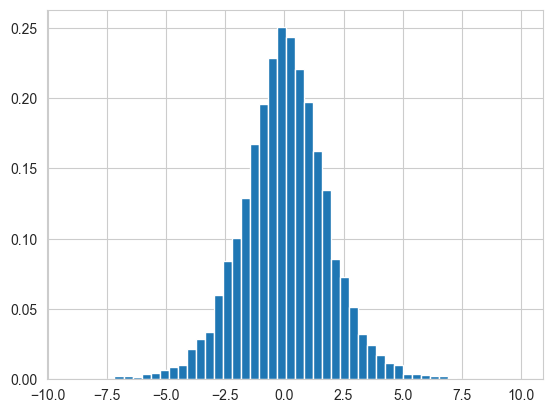

In [5]:
plt.hist(sample_x,bins=50,density=True)
plt.show()

Let's compare it with an actual logistic pdf, which you can call using the function scipy.stats.logistic.pdf(x)

In [8]:
from scipy.stats import logistic # this makes it less cumbersome to call the function

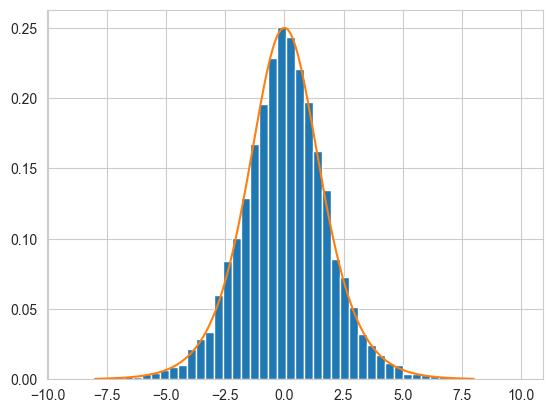

In [7]:
x_range= np.linspace(-8,8,1000)
plt.hist(sample_x,bins=50,density=True)
plt.plot(x_range,logistic.pdf(x_range)) # Plot the pdf of a logistic
plt.show()

chef's kiss